In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

input_dims = 32

def build_model(input_dims):
    input_layer = tf.keras.layers.Input(shape = (input_dims,))

    attention_probs = tf.keras.layers.Dense(input_dims, activation = 'softmax')(input_layer)
    attention_mul = tf.keras.layers.multiply([input_layer, attention_probs])

    fc_attention_mul = tf.keras.layers.Dense(64)(attention_mul)
    y = tf.keras.layers.Dense(1, activation='sigmoid')(fc_attention_mul)

    return tf.keras.Model( inputs=[input_layer], outputs = y)

model = build_model(input_dims)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 32)           1056        input_2[0][0]                    
__________________________________________________________________________________________________
multiply (Multiply)             (None, 32)           0           input_2[0][0]                    
                                                                 dense_5[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 64)           2112        multiply[0][0]        

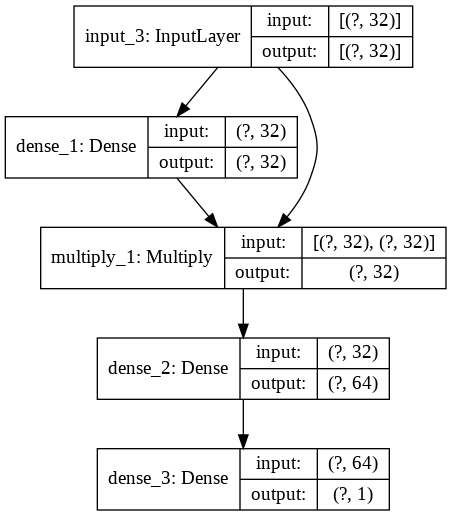

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
def get_data(n, input_dims, attention_column= 1):

    train_x = np.random.standard_normal(size = (n, input_dims))
    train_y = np.random.randint(low=0, high = 2, size = (n, 1))
    train_x[:, attention_column] = train_y[:, 0]

    return (train_x, train_y)

train_x, train_y = get_data(10000,32,5)
test_x, test_y = get_data(10000,32,5)

train_x.shape , train_y.shape

((10000, 32), (10000, 1))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_x,train_y, epochs = 20, batch_size = 64, validation_split = 0.5, verbose =2 )

Epoch 1/20
79/79 - 0s - loss: 0.6881 - accuracy: 0.5816 - val_loss: 0.6786 - val_accuracy: 0.6654
Epoch 2/20
79/79 - 0s - loss: 0.6538 - accuracy: 0.7384 - val_loss: 0.6193 - val_accuracy: 0.7508
Epoch 3/20
79/79 - 0s - loss: 0.5614 - accuracy: 0.7882 - val_loss: 0.5093 - val_accuracy: 0.7730
Epoch 4/20
79/79 - 0s - loss: 0.4418 - accuracy: 0.8202 - val_loss: 0.3949 - val_accuracy: 0.8294
Epoch 5/20
79/79 - 0s - loss: 0.3238 - accuracy: 0.8768 - val_loss: 0.2756 - val_accuracy: 0.9016
Epoch 6/20
79/79 - 0s - loss: 0.2030 - accuracy: 0.9424 - val_loss: 0.1559 - val_accuracy: 0.9514
Epoch 7/20
79/79 - 0s - loss: 0.0977 - accuracy: 0.9836 - val_loss: 0.0659 - val_accuracy: 0.9900
Epoch 8/20
79/79 - 0s - loss: 0.0367 - accuracy: 0.9982 - val_loss: 0.0250 - val_accuracy: 0.9988
Epoch 9/20
79/79 - 0s - loss: 0.0141 - accuracy: 0.9996 - val_loss: 0.0117 - val_accuracy: 0.9996
Epoch 10/20
79/79 - 0s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9998
Epoch 11/20
79/79 -

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)

In [ ]:
output_data = activation_model.predict(test_x)

In [ ]:
output_data

[array([[ 1.589186  , -1.0720396 ,  0.53581345, ..., -0.09937954,
          0.023669  ,  0.26198202],
        [-0.39865178, -0.9051685 ,  0.8508436 , ...,  1.013737  ,
          0.11770222,  0.31414053],
        [-0.81289744,  0.5079591 ,  0.8293879 , ...,  0.98716325,
         -0.48313683, -0.36869887],
        ...,
        [-1.0684463 , -0.71505266,  0.2714945 , ...,  0.67066824,
          0.85692585,  0.42849895],
        [ 0.77235615, -1.9078348 ,  0.72396266, ...,  0.66126186,
         -1.8537031 ,  0.17003238],
        [ 0.12436146, -0.2845431 ,  0.60474455, ..., -0.18132216,
          0.07203862, -1.2870872 ]], dtype=float32),
 array([[0.01354854, 0.00703346, 0.01133805, ..., 0.01557294, 0.01664197,
         0.01491201],
        [0.00899099, 0.00988449, 0.01355419, ..., 0.00839216, 0.0119404 ,
         0.01503657],
        [0.00753713, 0.01438321, 0.01990987, ..., 0.01481719, 0.01172649,
         0.01431952],
        ...,
        [0.01776755, 0.02581695, 0.01470681, ..., 0.02048

In [ ]:
print(len(output_data))

5


In [ ]:
print(output_data[1], output_data[1].shape)

[[0.01354854 0.00703346 0.01133805 ... 0.01557294 0.01664197 0.01491201]
 [0.00899099 0.00988449 0.01355419 ... 0.00839216 0.0119404  0.01503657]
 [0.00753713 0.01438321 0.01990987 ... 0.01481719 0.01172649 0.01431952]
 ...
 [0.01776755 0.02581695 0.01470681 ... 0.0204828  0.03589555 0.02429498]
 [0.01447691 0.0212655  0.03846556 ... 0.02649865 0.04903077 0.03613713]
 [0.02140922 0.01781764 0.02312722 ... 0.01958481 0.01785323 0.02056909]] (10000, 32)


In [ ]:
attention_vector = np.mean(output_data[1], axis = 0)
print(attention_vector, attention_vector.shape)

[0.01773745 0.01964101 0.02105598 0.01932729 0.02146769 0.31953225
 0.0206443  0.03261395 0.02031193 0.02058076 0.01666986 0.02139165
 0.01997292 0.03410187 0.02347941 0.02500211 0.0188199  0.02933401
 0.02787815 0.02661759 0.02000249 0.02124757 0.0192157  0.01892675
 0.0190571  0.02207884 0.01938286 0.02090575 0.02034649 0.01849471
 0.02334907 0.02081284] (32,)


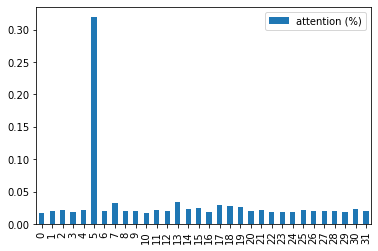

In [ ]:
df = pd.DataFrame(attention_vector.transpose(), columns = ['attention (%)'])
df.plot.bar()

In [35]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

y_train = y_train.reshape(25000,1)
y_test = y_test.reshape(25000,1)

max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(GRU(128))
# model.add(Dense(1, activation='sigmoid'))

In [36]:
x_train = np.concatenate((x_train,x_train,x_train,x_train), axis = 0)
y_train = np.concatenate((y_train,y_train,y_train,y_train), axis = 0)
x_test = np.concatenate((x_test,x_test,x_test,x_test), axis = 0)
y_test = np.concatenate((y_test,y_test,y_test,y_test), axis = 0)

(100000, 500)

In [54]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights


# class BahdanauAttention(tf.keras.Model):
#   def __init__(self, units):
#     super(BahdanauAttention, self).__init__()
#     self.W1 = tf.keras.layers.Dense(units)
#     self.W2 = tf.keras.layers.Dense(units)
#     self.V = tf.keras.layers.Dense(1)

#   def call(self, query, values):
#     # query hidden state shape == (batch_size, hidden size)
#     # query_with_time_axis shape == (batch_size, 1, hidden size)
#     # values shape == (batch_size, max_len, hidden size)
#     # we are doing this to broadcast addition along the time axis to calculate the score
#     query_with_time_axis = tf.expand_dims(query, 1)

#     # score shape == (batch_size, max_length, 1)
#     # we get 1 at the last axis because we are applying score to self.V
#     # the shape of the tensor before applying self.V is (batch_size, max_length, units)
#     score = self.V(tf.nn.tanh(
#         self.W1(query_with_time_axis) + self.W2(values)))

#     # attention_weights shape == (batch_size, max_length, 1)
#     attention_weights = tf.nn.softmax(score, axis=1)

#     # context_vector shape after sum == (batch_size, hidden_size)
#     context_vector = attention_weights * values
#     context_vector = tf.reduce_sum(context_vector, axis=1)

#     return context_vector, attention_weights

In [55]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os
from tensorflow import keras

keras.backend.clear_session()
max_len = 500

def build_model(max_len):
    sequence_input = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

    lstm = Bidirectional(LSTM(128, dropout=0.5, return_sequences = True))(embedded_sequences)

    lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64,dropout=0.5, return_sequences = True, return_state = True))(lstm)

    state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
    state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])

    attention = BahdanauAttention(128)
    context_vector, attention_weights = attention(lstm,state_h)

    dense1 = tf.keras.layers.Dense(128)(context_vector)
    dropout = tf.keras.layers.Dropout(0.5)(dense1)
    output = tf.keras.layers.Dense(1, activation = "sigmoid")(dropout)

    return tf.keras.Model( inputs= sequence_input, outputs = output)

model = build_model(max_len)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 128)     1280000     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 500, 256)     263168      embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 500, 128), ( 164352      bidirectional[0][0]              
_______________________________________________________________________________________

In [56]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 20, batch_size = 1024, validation_split = 0.3, verbose = 1)

Epoch 1/20
 1/69 [..............................] - ETA: 0s - loss: 0.6931 - accuracy: 0.4951

CancelledError: ignored

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

y_train = y_train.reshape(25000,1)
y_test = y_test.reshape(25000,1)

max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights
  
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os
from tensorflow import keras

keras.backend.clear_session()
input_dims = 500

def build_model(input_dims):
    sequence_input = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

    lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

    lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64,dropout=0.5, return_sequences = True, return_state = True))(lstm)

    state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
    state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])

    attention = BahdanauAttention(512)
    context_vector, attention_weights = attention(lstm,state_h)

    dense1 = tf.keras.layers.Dense(512)(context_vector)
    dense2 = tf.keras.layers.Dense(512)(dense1)
    dense3 = tf.keras.layers.Dense(512)(dense2)
    dropout = tf.keras.layers.Dropout(0.5)(dense3)
    output = tf.keras.layers.Dense(1, activation = "sigmoid")(dropout)

    return tf.keras.Model( inputs= sequence_input, outputs = output)

model = build_model(input_dims)
print(model.summary())

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 20, batch_size = 1024, validation_split = 0.3, verbose =2)




Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 128)     1280000     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 500, 128)     98816       embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 500, 128), ( 98816       bidirectional[0][0]              
_______________________________________________________________________________________